In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [5]:
y_train[9]

4

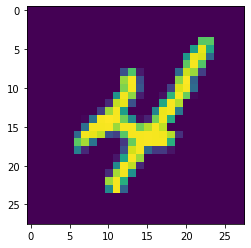

In [6]:
plt.imshow(X_train[9])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.3384 - accuracy: 0.9464 - val_loss: 0.0834 - val_accuracy: 0.9731
Epoch 2/5
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0774 - accuracy: 0.9762 - val_loss: 0.0959 - val_accuracy: 0.9719
Epoch 3/5
1875/1875 [==============================] - 188s 100ms/step - loss: 0.0551 - accuracy: 0.9829 - val_loss: 0.0786 - val_accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 188s 100ms/step - loss: 0.0407 - accuracy: 0.9873 - val_loss: 0.0913 - val_accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.1112 - val_accuracy: 0.9751


In [ ]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 93ms/step
[[2.0251504e-07 1.6345092e-17 1.5534070e-10 5.8839407e-07 4.1171976e-13
  2.1261840e-15 3.1503283e-21 9.9999917e-01 4.6074252e-11 8.4267110e-10]
 [4.6592880e-10 1.6502280e-11 9.9999976e-01 3.1279278e-12 1.5275097e-12
  1.1680572e-15 1.8084812e-07 1.4708944e-17 6.9710454e-10 1.2626536e-14]
 [1.0370654e-08 9.9999535e-01 8.7095160e-08 1.4830120e-10 5.9969818e-07
  3.0072140e-08 3.1842986e-09 3.5307686e-08 3.9637157e-06 5.7182271e-12]
 [1.0000000e+00 2.9306054e-18 9.3909438e-12 7.1079306e-17 5.3423238e-12
  1.3848623e-13 9.1925105e-12 3.4233396e-13 3.0450129e-10 9.7559330e-12]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:6])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
model.save("model.h5")

In [17]:
model=load_model("model.h5")